# Исследование рынка российского кинопроката 

## Изучение данных

In [1]:
import pandas as pd

In [2]:
try:
    df_movies = pd.read_csv('mkrf_movies.csv')
    df_shows = pd.read_csv('mkrf_shows.csv')
    
except FileNotFoundError:
    df_movies = pd.read_csv('/datasets/mkrf_movies.csv')
    df_shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [3]:
import os 
os.path.abspath(os.curdir)

'/home/user-0-501163977/work'

Изучение файла с фильмами

In [4]:
display(df_movies.head(10))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [5]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


Cогласно документации, таблица `df_movies` содержит информацию из реестра прокатных удостоверений. 
У одного фильма может быть несколько прокатных удостоверений.

В таблице 15 столбцов со следующими типами данных: `object` и `float`

* `title` — название фильма;
* `puNumber` — номер прокатного удостоверения;
* `show_start_date` — дата премьеры фильма;
* `type` — тип фильма;
* `film_studio` — студия-производитель;
* `production_country` — страна-производитель;
* `director` — режиссёр;
* `producer` — продюсер;
* `age_restriction` — возрастная категория;
* `refundable_support` — объём возвратных средств государственной поддержки;
* `nonrefundable_support` — объём невозвратных средств государственной поддержки;
* `financing_source` — источник государственного финансирования;
* `budget` — общий бюджет фильма;
* `ratings` — рейтинг фильма на КиноПоиске;
* `genres` — жанр фильма.

Столбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

In [6]:
display(df_movies.describe())

,refundable_support,nonrefundable_support,budget
count,3.320000e+02,3.320000e+02,3.320000e+02
mean,1.186446e+07,4.898099e+07,1.272297e+08
std,2.491656e+07,5.998012e+07,1.885883e+08
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.500000e+07,4.200000e+07
50%,0.000000e+00,3.000000e+07,6.864992e+07
75%,1.500000e+07,4.037500e+07,1.419853e+08
max,1.800000e+08,4.000000e+08,2.305074e+09


### Вывод №1

Какие проблемы `df_movies` в данных обнаружены визуально:

    1. Некорректное название столбца puNumber, содержит прописную букву
    2. Пропуски (NaN) в колонках 'refundable_support', 'nonrefundable_support', 'budget', 'financing_source'
    3. Тип данных графы 'show_start_date' 'object' вместо 'datetime'
    4. Пропуски (NaN) в графе 'producer'
    5. Тип данных в колонке 'puNumber' "object", хотя на первый взгляд в графе одни числа
    6. Колонка 'ratings' имеет тип данных 'object' вместо 'float'
    7. NaN-ы в столбце "producer"

Изучим таблицу с шоу `df_shows`

In [7]:
display(df_shows.head())

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [8]:
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


В таблице содержится 2 столбца с типами данных `int` и `float`.

Согласно документации, датасет `df_shows` содержит сведения о показах фильмов в российских кинотеатрах.

* `puNumber` — номер прокатного удостоверения;
* `box_office` — сборы в рублях.


In [9]:
 display(df_shows.describe())

,puNumber,box_office
count,3.158000e+03,3.158000e+03
mean,1.201875e+08,7.647870e+07
std,1.238394e+07,2.403531e+08
min,1.110001e+08,0.000000e+00
25%,1.130002e+08,8.623900e+04
50%,1.210131e+08,2.327988e+06
75%,1.210283e+08,2.397967e+07
max,2.240264e+08,3.073569e+09


### Вывод №2

Какие проблемы `df_shows` в данных обнаружены визуально: 

    1. Некорректное название столбца `puNumber`

## Предобработка данных

### Преобразование типов данных

Для начала переименуем столбцы таблиц со строчными буквами на корректные. В обоих таблицах этот столбец называется `puNumber`:

In [10]:
df_shows = df_shows.rename(columns=({'puNumber' : 'release_doc_number'}))

In [11]:
print(df_shows.columns) 

Index(['release_doc_number', 'box_office'], dtype='object')


In [12]:
df_movies = df_movies.rename(columns=({'puNumber' : 'release_doc_number'}))

In [13]:
print(df_movies.columns)

Index(['title', 'release_doc_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres'],
      dtype='object')


Колонки переименованы.

Теперь изменим типы данных, о которых говорилось в пунке исследования 1.1:

In [14]:
df_movies['show_start_date'] = pd.to_datetime(df_movies['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%f')
print(df_movies['show_start_date'])

0      2015-11-27 12:00:00+00:00
1      2016-09-13 12:00:00+00:00
2      2016-10-10 12:00:00+00:00
3      2016-06-10 12:00:00+00:00
4      2015-07-29 12:00:00+00:00
                  ...           
7481   2019-12-23 12:00:00+00:00
7482   2019-12-24 12:00:00+00:00
7483   2019-12-28 12:00:00+00:00
7484   2019-12-30 12:00:00+00:00
7485   2019-12-30 12:00:00+00:00
Name: show_start_date, Length: 7486, dtype: datetime64[ns, UTC]


Заменим тип столбца номера релиза фильма на целочисленный:

In [15]:
df_movies['release_doc_number'] = df_movies['release_doc_number']
# print(~df_movies['release_doc_number'].str.isdigit())
df_movies['release_doc_number'][~(df_movies['release_doc_number'].str.isdigit())] = 0
df_movies['release_doc_number'] = df_movies['release_doc_number'].astype('int')
print(df_movies['release_doc_number'].dtypes)

int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
" 2".isdigit()

False

Тип данных столбца изменен на `int`, а странные значения заменены на 0.

#### Вывод

Изменила по-позможности типы данных столбцов на соответствующие значениям. Привела значения столбцов к единому формату. Колонки с некорректными названиями переименованы.

### Обработка пропусков

Изучим пропущенные значения в данных, и, по-возможности, заполним их:

In [17]:
df_movies.isna().sum()

title                       0
release_doc_number          0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
dtype: int64

Пропущено несколько значений о студии-производителе (`film_studio`)
Немало пропусков имен продюссеров в графе `producer`
Большая часть значений в столбцах финансирования пустуют. Процентов 8 строк столбцов `ratings` и `genres` не заполнены по какой-то причине.

Столбец `ratings` имеет тип данных 'object' и перевести в тип float просто так не получится - скорее всего, там есть строки или не численные типы данных. Исследуем графу `ratings`:

In [18]:
pivot_rating = pd.pivot_table(df_movies, index='ratings', values='release_doc_number', aggfunc='count')
display(pivot_rating)

,release_doc_number
ratings,
1.0,1
1.1,2
1.2,1
1.3,1
1.4,2
...,...
91%,3
94%,3
97%,3


Все понятно - часть рейтинга записана в строковой форме. Но наны не позволяют легким движением руки перевести проценты в числа.

Похоже, что эти наны и портят всю статистику. Если заменить эти наны на нули, можно сильно исказить выборку нулевыми значениями рейтингов, тогда как их просто нет. Но и оставить пропуски тоже не выйдет, т.к. иначе не получится изменить тип данных чисел и привести проценты к общему виду. Также по категориальным нельзя будект строить графики и анализировать популярность фильмов. Заполним этим словом 'nan' все пропуски данных, чтобы можно было изменить тип данных столбца на численный.

In [19]:
print(df_movies['ratings'].isna().sum())

967


In [20]:
df_movies['ratings'] = df_movies['ratings'].fillna('nan')

In [21]:
df_movies['ratings'].value_counts()

nan    967
6.6    312
6.7    308
6.8    261
7.2    252
      ... 
28%      1
90%      1
64%      1
62%      1
89%      1
Name: ratings, Length: 95, dtype: int64

In [22]:
import numpy as np
# print(df_movies['ratings'].value_counts())
df_movies['ratings'][df_movies['ratings'].str.contains('%')] = df_movies[df_movies['ratings'].str.contains('%')]['ratings'].str.rstrip('%').astype(float) / 10.0
df_movies['ratings'][df_movies['ratings'] != 'nan'] = df_movies['ratings'][df_movies['ratings'] != 'nan'].astype(float)
df_movies['ratings'] = df_movies['ratings'].replace('nan', np.NaN)
# print(df_movies['ratings'].value_counts())


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [23]:
print(df_movies['ratings'].unique())

[7.2 6.6 6.8 7.7 8.3 8.  7.8 8.1 7.1 6.  7.4 5.8 8.7 6.3 6.9 5.  4.3 7.3
 7.  6.4 nan 8.2 7.5 6.7 7.9 5.9 6.2 5.6 6.5 2.4 7.6 6.1 8.6 8.5 8.8 5.5
 5.1 5.7 5.4 9.9 4.4 4.5 5.3 4.1 8.4 2.6 3.8 4.6 4.8 4.  3.  1.6 4.2 5.2
 4.7 4.9 3.9 2.7 3.3 2.9 2.8 3.7 1.4 3.1 9.7 3.5 3.2 1.5 2.1 2.5 9.2 3.4
 1.1 3.6 9.1 9.4 9.  1.9 1.  8.9 1.3 1.8 1.2 1.7 9.8]


Тип данных колонки остался `object` из-за строковых 'nan'-ов

In [24]:
print(type(df_movies['ratings'][0]))

<class 'numpy.float64'>


NaN-ы и нулевые значения могут означать, что эти фильмы еще не вышли и рейтинг отсутсвует. Поэтому нет смысла заполнять NaN-s нулями, это создаст выбросы и будет мешать анализу.

In [25]:
display(df_movies.head(2))

,title,release_doc_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"


In [26]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
release_doc_number       7486 non-null int64
show_start_date          7486 non-null datetime64[ns, UTC]
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null float64
genres                   6510 non-null object
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(9)
memory usage: 877.4+ KB


In [27]:
print(df_movies['financing_source'].unique())

[nan 'Министерство культуры' 'Фонд кино'
 'Министерство культуры, Фонд кино']


In [28]:
print(df_movies['nonrefundable_support'].unique())

[           nan 2.65000000e+07 2.60000000e+07 1.07847945e+08
 2.80000000e+07 2.50000000e+07 1.00000000e+08 4.65022990e+07
 7.50000000e+07 3.40000000e+07 3.00000000e+07 4.00000000e+07
 2.30000000e+07 4.50000000e+07 5.65790550e+07 2.55000000e+07
 2.75100000e+07 1.00000000e+07 2.40000000e+07 2.45000000e+07
 2.70000000e+07 5.00000000e+06 9.00000000e+07 2.00000000e+07
 7.00000000e+07 9.70000000e+07 2.44500000e+07 5.00000000e+07
 0.00000000e+00 6.00000000e+07 2.75000000e+07 2.69500000e+07
 1.10000000e+08 1.50000000e+07 5.90000000e+07 2.50000000e+08
 3.70000000e+07 3.50000000e+07 2.01452850e+07 2.59000000e+07
 6.00000000e+06 3.92104482e+08 2.52000000e+07 2.29040000e+07
 2.90000000e+07 5.10000000e+07 4.70000000e+06 5.30000000e+06
 2.17000000e+07 2.49860000e+07 2.53450000e+07 1.33000000e+08
 1.75000000e+08 3.01239150e+07 2.85000000e+07 3.00000000e+08
 4.15000000e+07 2.00000000e+08 1.50000000e+08 5.50000000e+07
 6.40000000e+07 5.00008660e+07 1.15200000e+07 1.90000000e+08
 2.25000000e+08 8.000000

In [29]:
print(df_movies['director'].value_counts().sort_values())

Бен Блейн, Крис Блейн                                                    1
Дастин Хоффман                                                           1
Дэн Фогельман                                                            1
Ю.Суходольский                                                           1
Том Ван Авермат, Брайан Бакли, Ян Ингленд, Шон Кристенсен, Сэм Френч     1
                                                                        ..
Тиль Швайгер                                                            14
Ридли Скотт                                                             16
Стивен Содерберг                                                        17
Д.Червяцов                                                              17
О.Семёнова                                                              47
Name: director, Length: 4811, dtype: int64


В большинстве строк содержатся пропущенные значения.

#### Вывод

Большинство пропусков оставлены незаполненными,т.к. чаще всего это пропуски в названиях, которые мы не можем заполнить, либо могут исказить выборку, создав аномалмии. 

### Обработка дубликатов

Изучим, имеются ли явные дубликаты в таблице `df_movies`:

In [30]:
print(df_movies.duplicated().sum())

0


In [31]:
print(df_shows.duplicated().sum())

0


Не обнаружено явных дубликатов. Посмотрим, какие есть особенности в данных, возможно, там найдутся дубликаты.

Изучим, есть ли дубликаты в столбце номеров прокатного удостоверения:

In [32]:
print(df_shows['release_doc_number'].duplicated().sum())

0


In [33]:
print(df_movies['release_doc_number'].duplicated().sum())

3


In [34]:
display(df_movies[df_movies['release_doc_number'].duplicated()])

,title,release_doc_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),0,2014-05-15 12:00:00+00:00,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история"
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал"


Почему-то первый номер релиза посчитался ка дубликат, но по двум остальным понятно, что это разные фильмы с одним регистрационным номером проката. Вероятнее всего, это ошибка в номере проката.

Посчитаем дубликаты в названиях фильмов `title`:

In [35]:
print(df_movies['title'].duplicated().sum())

714


А среди названий дубликатов много. Разные прокатные номера могут быть связаны с тем, что фильм показывают разные прокатчики или в разных форматах. Попробуем найти еще дубликаты, приведя данные к одному регистру.

In [36]:
df_movies['title'] = df_movies['title'].str.lower()
print(df_movies['title'].duplicated().sum())

724


И еще 10 дубликатов нашлось.

#### Вывод

Я решила, что фильмы с различными прокатными лицензиями следует считать по-разному, поэтому не стала объединять дубликаты в один фильм и нужно их считать по-разному.

### Категориальные данные

Изучим столбцы, которые содержат категориальные данные

In [37]:
print(df_movies['production_country'].value_counts())

США                                                    2172
Россия                                                 1821
СССР                                                    347
Франция                                                 301
Великобритания                                          257
                                                       ... 
США - Великобритания - Исландия                           1
Швейцария-Франция                                         1
Россия, Франция, Латвия                                   1
Россия, Испания                                           1
США - Великобритания - Германия - - Швеция - Канада       1
Name: production_country, Length: 950, dtype: int64


По срезу этой колонки видно, что данные содержат по несколько стран, которые повторяются в различных вариациях.

In [38]:
print(df_movies['genres'].value_counts())

драма                               476
комедия                             352
мелодрама,комедия                   222
драма,мелодрама,комедия             189
драма,мелодрама                     183
                                   ... 
фантастика,комедия,боевик             1
документальный,триллер,биография      1
мюзикл,мелодрама,фэнтези              1
драма,спорт,боевик                    1
мультфильм,детский,комедия            1
Name: genres, Length: 742, dtype: int64


Аналогичная картина для графы жанров, это списки жанров с повторяющимися словами

In [39]:
print(df_movies['age_restriction'].value_counts())

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1593
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64


Колонка `age_restriction` гораздо понятнее, чем предыдущие, но все же, с ней по-прежнему трудно работать: я бы отделила возраст в отдельный, численный столбец, а вторую часть строки оставила бы как описание.

In [40]:
print(df_movies['type'].unique())

['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный']


Некоторые слова дублируются в виде названий с пробелами. Исправим это.

In [41]:
df_movies['type'] = df_movies['type'].where(df_movies['type']!=' Художественный', 'Художественный')

In [42]:
df_movies['type'] = df_movies['type'].where(df_movies['type']!=' Анимационный', 'Анимационный')

In [43]:
print(df_movies['type'].unique())

['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' 'Музыкально-развлекательный']


Теперь повторяющихся значений в столбце `type` нет.

In [44]:
print(df_movies['film_studio'].value_counts().sort_values())

Студия "Беларусьфильм", ООО "Централ Партнершип"                                                                                                                                          1
Би-Би-Си, Кросс Стрит Филмз, Перфект Ворлд Пикчерз                                                                                                                                        1
Эй Джи Си Студиос, Центрополис Интертейнмент, Интертейнмент Ван, Ру Йи Медиа, Старлайт Калчер Интертейнмент, Стрит Интертейнмент, Марк Гордон Компани                                     1
Ле Фильм де Турней, Патэ, Оранж Студио, Алви Дистрибусьон, Франс 2 Синема, Кофимаж 24, Софисинема 9, Банк Популер Имаж 6, Синемаж 7, Франс Телевизьон, Канал +, Сине +, Иль де Франс      1
Адам Шредер Продакшнз, Дэвис Интертейнмент                                                                                                                                                1
                                                            

Здесь есть одинаковые названия киностудий, которые посчитаны как уникальные - скорее всего, из-за пробелов

In [45]:
print(df_movies['financing_source'].value_counts())

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64


Фильмы спонсируют фонды в по-отдельности и одновременно.

In [46]:
print(df_movies['producer'].value_counts())

П.Смирнов                                                               67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина                           28
С.Сельянов                                                              18
Д.Ловейко, О.Кузовков                                                   17
Джерри Брукхаймер                                                       11
                                                                        ..
Камаль Бансаль                                                           1
Аарон Барнетт, Эри Лантос, Роберт Лантош                                 1
Винсент Витторио, Ливия Джуджолли, Майкл Росс, Люси Сигл, Крис Харви     1
Роберт Бенмусса, Роман Полански, Ален Сард                               1
Джулиус Р.Нассо, Стивен Сигал                                            1
Name: producer, Length: 5349, dtype: int64


In [47]:
print(df_movies['title'].value_counts())

день святого валентина_                                        5
гарри поттер и дары смерти - часть 1/по роману дж.к.ролинг/    4
рапунцель: запутанная история                                  4
знакомство с факерами 2.                                       4
безумцы                                                        4
                                                              ..
землетрясение /по произведению су сяо вея/                     1
зеленая карета                                                 1
последний самурай                                              1
мой парень - киллер                                            1
самая одинокая планета /по рассказу тома бисселла/             1
Name: title, Length: 6762, dtype: int64


Некоторые фильмы повторяются. Позже можно будет изучить причину таких повторов.

Разделим таблицу на две, в одну из них положим категориальные данные(`release_doc_number`, `title`, `type`, `film_studio`, `production_country`, `director`, `producer`, `financing_source`, `genres`), в другую колличественные, а общим столбцом выберем release_doc_number

In [48]:
movies_info = df_movies[['release_doc_number', 'title', 'type', 'film_studio', 'production_country', 'director', 'producer', 'age_restriction','financing_source', 'genres']]

In [49]:
display(movies_info.head(3))

,release_doc_number,title,type,film_studio,production_country,director,producer,age_restriction,financing_source,genres
0,221048915,открытый простор,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,"боевик,драма,мелодрама"
1,111013716,особо важное задание,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,"драма,военный"
2,221038416,особо опасен,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,"фантастика,боевик,триллер"


Такую таблицу стало гораздо удобнее изучать

#### Вывод

В общем категориальные данные объединяет то, что уникальных значений очень много, и их можно бы оптимизировать, выделив важные нам категории и сгруппировать по ним строки. Например, все фильмы, произведенные в России.

### Количественные переменные

Теперь изучим количеcтвенные данные.

Создадим переменную, в которой будет храниться срез таблицы `df_movies`, состоящий из колличественных данных:

In [50]:
movies_stat = df_movies[['release_doc_number', 'show_start_date', 'refundable_support', 'nonrefundable_support', 'budget', 'ratings']]

In [51]:
display(movies_stat.head(3))

,release_doc_number,show_start_date,refundable_support,nonrefundable_support,budget,ratings
0,221048915,2015-11-27 12:00:00+00:00,NaN,NaN,NaN,7.2
1,111013716,2016-09-13 12:00:00+00:00,NaN,NaN,NaN,6.6
2,221038416,2016-10-10 12:00:00+00:00,NaN,NaN,NaN,6.8


In [52]:
for column in ['budget', 'refundable_support','nonrefundable_support']:
    print('Уникальные значения столбца', column, ', и частота их встречаемости:')
    print(movies_stat[column].value_counts())
    print()

Уникальные значения столбца budget , и частота их встречаемости:
0.0           17
38000000.0     6
80000000.0     4
50000000.0     4
37142857.0     3
              ..
74071918.0     1
48571430.0     1
69883049.0     1
51196711.0     1
46923776.0     1
Name: budget, Length: 290, dtype: int64

Уникальные значения столбца refundable_support , и частота их встречаемости:
0.0            221
20000000.0      12
25000000.0      10
10000000.0      10
15000000.0       9
5000000.0        9
50000000.0       8
40000000.0       8
30000000.0       7
60000000.0       6
100000000.0      5
110000000.0      2
55000000.0       2
75000000.0       2
19000000.0       2
115000000.0      1
8000000.0        1
7346881.0        1
44000000.0       1
28000000.0       1
7153119.0        1
26000000.0       1
41000000.0       1
17000000.0       1
150000000.0      1
36000000.0       1
38000000.0       1
180000000.0      1
9000000.0        1
3500000.0        1
35000000.0       1
80000000.0       1
29000000.0       1
700

Cтранных значений пока не обнаружено в этих данных.

#### Вывод 

Выше при заполнении пропусков были выявлены и исправлены странные значения в количественных данных и заменены на корректные (была замечена строка 'нет' в графе `release_doc_number`). В графе `ratings` пропуски заменили на 'nan', это необходимо было сделать, чтобы обработать данные и привести к одному формату. В графе `release_doc_number` мы заменили строковые данные (у таких фильмов номеров релизов нет) на нули, поскольку прокатное удостоверение с номером 0 нигде не использовалось. Типы данных были заменены с типа `object` на тип `int` в строках `ratings` и `release_doc_number`. В графе `ratings` данные были приведены к одному виду типа float (и данные, представленные процентами были приведены к интервалу 0-1).
Столбцы `refundable_support`, `nonrefundable_support` и `budget` имеют тип данных `float`, поэтому там нет посторонних значений.

### Добавление столбцов 

Вычислим год проката фильма. Для этого создадим столбец в таблице и заполним его соответствующими значениями года, которые возьмем из графы `show_start_date`

In [53]:
movies_stat['year'] = movies_stat['show_start_date'].dt.year
movies_stat['year'].dtypes

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


dtype('int64')

In [54]:
display(movies_stat.head(3))

,release_doc_number,show_start_date,refundable_support,nonrefundable_support,budget,ratings,year
0,221048915,2015-11-27 12:00:00+00:00,NaN,NaN,NaN,7.2,2015
1,111013716,2016-09-13 12:00:00+00:00,NaN,NaN,NaN,6.6,2016
2,221038416,2016-10-10 12:00:00+00:00,NaN,NaN,NaN,6.8,2016


Появилась отдельная графа с годом выхода фильма

Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. 

В столбцы войдут первые значения из списка режиссёров из графы `director` и жанров (`genre`) соответственно.

Создадим функцию, которая заполнит таблицу нужными значениями:

In [55]:
display(movies_info.head(2))

,release_doc_number,title,type,film_studio,production_country,director,producer,age_restriction,financing_source,genres
0,221048915,открытый простор,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,"боевик,драма,мелодрама"
1,111013716,особо важное задание,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,"драма,военный"


In [56]:
def take_first_name(raw):
    """
    Функция возвращает первое имя из графы директоров датасета
    
    """
    directors = raw['director']
    return raw['director'].split(',')[0]
    
movies_info['name'] = 'nan'
movies_info['name'][~movies_info['director'].isna()] = movies_info[~movies_info['director'].isna()].apply(take_first_name, axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [57]:
display(movies_info[50:55])

,release_doc_number,title,type,film_studio,production_country,director,producer,age_restriction,financing_source,genres,name
50,111005815,асса,Художественный,"Киностудия ""Мосфильм""",СССР,С.Соловьев,NaN,«16+» - для детей старше 16 лет,NaN,"фэнтези,боевик",С.Соловьев
51,221015415,бандитки.,Художественный,"Европа Корп., ТФ 1 Фильм Продюксьон",Франция - Мексика - США,"Иоахим Реннинг, Эспен Сандберг","Люк Бессон, Ариель Зейтун",«12+» - для детей старше 12 лет,NaN,"боевик,комедия,криминал",Иоахим Реннинг
52,111010513,айболит - 66,Художественный,"Киностудия ""Мосфильм""",СССР,Ролан Быков,NaN,«0+» - для любой зрительской аудитории,NaN,"мюзикл,комедия,детский",Ролан Быков
53,111010813,алешкина любовь,Художественный,"Киностудия ""Мосфильм""",СССР,Семен Туманов,NaN,«12+» - для детей старше 12 лет,NaN,"драма,мелодрама,комедия",Семен Туманов
54,221004416,50 первых поцелуев,Художественный,"Коламбиа Пикчерз, Хэппи Медисон Продакшнз, Фла...",США,Питер Сигал,"Бини Барнс, Джозеф Дрэйк, Джон Линсон",«18+» - запрещено для детей,NaN,"комедия,мелодрама,драма",Питер Сигал


Первое или единственное имя добавлено в таблицу.

Добавим теперь первый жанр из графы `genre`:

In [58]:
def take_first_genre(raw):
    
    """
    Функция возвращает первый жанр из графы жанров датасета
    
    """
    
    genres = raw['genres']
    return raw['genres'].split(',')[0]
    
movies_info['main_genre'] = 'nan'
movies_info['main_genre'][~movies_info['genres'].isna()] = movies_info[~movies_info['genres'].isna()].apply(take_first_genre, axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [59]:
display(movies_info.head(3))

,release_doc_number,title,type,film_studio,production_country,director,producer,age_restriction,financing_source,genres,name,main_genre
0,221048915,открытый простор,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,"боевик,драма,мелодрама",Кевин Костнер,боевик
1,111013716,особо важное задание,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,"драма,военный",Е.Матвеев,драма
2,221038416,особо опасен,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,"фантастика,боевик,триллер",Тимур Бекмамбетов,фантастика


Главный жанр теперь есть в таблице.

Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [60]:
movies_stat['budget_share'] = (movies_stat['refundable_support'] + movies_stat['nonrefundable_support']) / movies_stat['budget']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
# Код ревьюера
movies_stat[movies_stat['budget_share'] == np.inf]

,release_doc_number,show_start_date,refundable_support,nonrefundable_support,budget,ratings,year,budget_share
2053,111023614,2014-12-19 12:00:00+00:00,0.0,23000000.0,0.0,6.6,2014,inf
2058,111000415,2015-01-26 12:00:00+00:00,0.0,75000000.0,0.0,6.6,2015,inf
2472,111017315,2015-09-28 12:00:00+00:00,10000000.0,70000000.0,0.0,7.8,2015,inf
2532,111009615,2015-05-26 12:00:00+00:00,20000000.0,0.0,0.0,6.2,2015,inf
2615,114001715,2015-07-21 12:00:00+00:00,60000000.0,100000000.0,0.0,4.6,2015,inf
2684,111010215,2015-06-08 12:00:00+00:00,0.0,59000000.0,0.0,6.3,2015,inf
2788,111017115,2015-09-30 12:00:00+00:00,0.0,35000000.0,0.0,5.1,2015,inf
2874,111004916,2016-03-01 12:00:00+00:00,0.0,6000000.0,0.0,4.3,2016,inf
3047,111008216,2016-04-29 12:00:00+00:00,19000000.0,51000000.0,0.0,6.3,2016,inf
3565,111018116,2016-12-16 12:00:00+00:00,0.0,250000000.0,0.0,5.6,2016,inf


In [62]:
display(movies_stat[~movies_stat['budget_share'].isna()])

,release_doc_number,show_start_date,refundable_support,nonrefundable_support,budget,ratings,year,budget_share
1281,111005313,2013-10-11 12:00:00+00:00,0.0,26500000.0,79411900.0,8.1,2013,0.333703
1448,111003314,2014-03-28 12:00:00+00:00,0.0,26000000.0,37142857.0,NaN,2014,0.700000
1498,111004213,2013-09-10 12:00:00+00:00,0.0,107847945.0,176023490.0,5.3,2013,0.612691
1524,111004314,2014-05-05 12:00:00+00:00,0.0,28000000.0,40574140.0,4.2,2014,0.690095
1792,111004414,2014-04-23 12:00:00+00:00,0.0,25000000.0,40015122.0,6.4,2014,0.624764
...,...,...,...,...,...,...,...,...
7464,111022019,2019-12-26 12:00:00+00:00,100000000.0,400000000.0,980000000.0,6.0,2019,0.510204
7466,114005019,2019-12-20 12:00:00+00:00,100000000.0,0.0,190000000.0,6.7,2019,0.526316
7474,111022519,2019-12-23 12:00:00+00:00,100000000.0,400000000.0,944000000.0,5.7,2019,0.529661
7476,111023019,2019-12-26 12:00:00+00:00,0.0,30000000.0,46154000.0,5.9,2019,0.649998


In [63]:
movies_stat = movies_stat.round(2)
display(movies_stat[~movies_stat['budget_share'].isna()])

,release_doc_number,show_start_date,refundable_support,nonrefundable_support,budget,ratings,year,budget_share
1281,111005313,2013-10-11 12:00:00+00:00,0.0,26500000.0,79411900.0,8.1,2013,0.33
1448,111003314,2014-03-28 12:00:00+00:00,0.0,26000000.0,37142857.0,NaN,2014,0.70
1498,111004213,2013-09-10 12:00:00+00:00,0.0,107847945.0,176023490.0,5.3,2013,0.61
1524,111004314,2014-05-05 12:00:00+00:00,0.0,28000000.0,40574140.0,4.2,2014,0.69
1792,111004414,2014-04-23 12:00:00+00:00,0.0,25000000.0,40015122.0,6.4,2014,0.62
...,...,...,...,...,...,...,...,...
7464,111022019,2019-12-26 12:00:00+00:00,100000000.0,400000000.0,980000000.0,6.0,2019,0.51
7466,114005019,2019-12-20 12:00:00+00:00,100000000.0,0.0,190000000.0,6.7,2019,0.53
7474,111022519,2019-12-23 12:00:00+00:00,100000000.0,400000000.0,944000000.0,5.7,2019,0.53
7476,111023019,2019-12-26 12:00:00+00:00,0.0,30000000.0,46154000.0,5.9,2019,0.65


### Вывод

## Исследовательский анализ данных

Посмотрим, сколько фильмов выходило в прокат каждый год.

Данные о прокате в кинотеатрах известны не для всех фильмов.

Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.
Для этого объединим нужные данные из двух таблиц и составим сводную таблицу:

In [64]:
release_data = movies_stat[['release_doc_number','year']]
display(release_data.head())

,release_doc_number,year
0,221048915,2015
1,111013716,2016
2,221038416,2016
3,221026916,2016
4,221030815,2015


In [65]:
release_data = release_data.merge(df_shows, on='release_doc_number',  how='outer')
release_data = release_data.merge(movies_info, on='release_doc_number', how='outer')
display(release_data.head())

,release_doc_number,year,box_office,title,type,film_studio,production_country,director,producer,age_restriction,financing_source,genres,name,main_genre
0,221048915,2015,NaN,открытый простор,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,"боевик,драма,мелодрама",Кевин Костнер,боевик
1,111013716,2016,NaN,особо важное задание,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,"драма,военный",Е.Матвеев,драма
2,221038416,2016,NaN,особо опасен,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,"фантастика,боевик,триллер",Тимур Бекмамбетов,фантастика
3,221026916,2016,NaN,особо опасен,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,"фантастика,боевик,триллер",Тимур Бекмамбетов,фантастика
4,221030815,2015,NaN,особо опасен,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,"фантастика,боевик,триллер",Тимур Бекмамбетов,фантастика


In [66]:
release_data['title'] = movies_info['title']

In [67]:
display(release_data.head())

,release_doc_number,year,box_office,title,type,film_studio,production_country,director,producer,age_restriction,financing_source,genres,name,main_genre
0,221048915,2015,NaN,открытый простор,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,"боевик,драма,мелодрама",Кевин Костнер,боевик
1,111013716,2016,NaN,особо важное задание,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,"драма,военный",Е.Матвеев,драма
2,221038416,2016,NaN,особо опасен,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,"фантастика,боевик,триллер",Тимур Бекмамбетов,фантастика
3,221026916,2016,NaN,особо опасен,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,"фантастика,боевик,триллер",Тимур Бекмамбетов,фантастика
4,221030815,2015,NaN,особо опасен,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,"фантастика,боевик,триллер",Тимур Бекмамбетов,фантастика


Каждый год выходило всех фильмов:

In [68]:
# released_movie_amount = pd.pivot_table(release_data, index = 'year', values = 'title', aggfunc='count')
print('Total titles:')
res = release_data[['year', 'title']].groupby('year').count()
display(res)

print("Unique titles:")
res = release_data[['year', 'title']].groupby('year').nunique()
res = res[['title']]
res.columns = ['all_movies_per_year']
display(res)

Total titles:


,title
year,
2010,989
2011,622
2012,594
2013,630
2014,808
2015,705
2016,818
2017,505
2018,891


Unique titles:


,all_movies_per_year
year,
2010,841
2011,559
2012,546
2013,586
2014,762
2015,670
2016,791
2017,504
2018,883


На последней таблице видно количество уникальных фильмов, выпускаемых ежегодно. Из этого видно, что число премьер ежегодно растет.

Посчитаем, какая доля фильмов составляют фильмы с указанной информацией о прокате:

In [69]:
#released_movie_share = (df_shows['release_doc_number'][~df_shows['release_doc_number'].isna()].count()) / (movies_stat['release_doc_number'][~movies_stat['release_doc_number'].isna()].count())

In [70]:
# print(released_movie_share)

In [71]:
show_merged = df_shows.merge(df_movies, on='release_doc_number', how='left').merge(movies_stat, on='release_doc_number', how='left')
display(show_merged.head())
show_merged.info()

,release_doc_number,box_office,title,show_start_date_x,type,film_studio,production_country,director,producer,age_restriction,...,financing_source,ratings_x,genres,show_start_date_y,refundable_support_y,nonrefundable_support_y,budget_y,ratings_y,year,budget_share
0,111000113,2.450000e+03,тайна перевала дятлова,2013-01-17 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Ренни Харлин,"А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм",«16+» - для детей старше 16 лет,...,NaN,5.1,"ужасы,фантастика",2013-01-17 12:00:00+00:00,NaN,NaN,NaN,5.1,2013,NaN
1,111000115,6.104000e+04,небесный верблюд,2015-01-14 12:00:00+00:00,Художественный,"ООО Продюсерский центр ""Всё хорошо""",Россия,Ю.Фетинг,И.Плиско,«0+» - для любой зрительской аудитории,...,Министерство культуры,6.7,"детский,семейный",2015-01-14 12:00:00+00:00,0.0,34000000.0,49280496.0,6.7,2015,0.69
2,111000116,1.530300e+08,"статус: ""свободен""",2016-01-13 12:00:00+00:00,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Ливнев, Д.Козловский, С.Бобза",«16+» - для детей старше 16 лет,...,Фонд кино,5.8,"комедия,мелодрама",2016-01-13 12:00:00+00:00,20000000.0,20000000.0,78686500.0,5.8,2016,0.51
3,111000117,1.226096e+07,после тебя,2017-01-10 12:00:00+00:00,Художественный,"Компания Production Value WorldWide (ООО ""ПРОД...",Россия,А.Матисон,С.Безруков,«16+» - для детей старше 16 лет,...,"Министерство культуры, Фонд кино",6.7,драма,2017-01-10 12:00:00+00:00,7000000.0,20000000.0,45483233.0,6.7,2017,0.59
4,111000118,1.636841e+08,зомбоящик (zомбоящик),2018-01-23 12:00:00+00:00,Художественный,"ООО ""Комеди Клаб продакшн""",Россия,"З.Болотаев, К.Смирнов","Е.Казаков, Т.Бадзиев",«18+» - запрещено для детей,...,NaN,3.2,комедия,2018-01-23 12:00:00+00:00,NaN,NaN,NaN,3.2,2018,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3158 entries, 0 to 3157
Data columns (total 23 columns):
release_doc_number         3158 non-null int64
box_office                 3158 non-null float64
title                      3158 non-null object
show_start_date_x          3158 non-null datetime64[ns, UTC]
type                       3158 non-null object
film_studio                3157 non-null object
production_country         3157 non-null object
director                   3157 non-null object
producer                   3042 non-null object
age_restriction            3158 non-null object
refundable_support_x       318 non-null float64
nonrefundable_support_x    318 non-null float64
budget_x                   318 non-null float64
financing_source           318 non-null object
ratings_x                  2914 non-null float64
genres                     2909 non-null object
show_start_date_y          3158 non-null datetime64[ns, UTC]
refundable_support_y       318 non-null float64
non

In [72]:
stat_by_year = pd.pivot_table(show_merged, index='year', values='title', aggfunc='nunique')
stat_by_year = stat_by_year[['title']]
stat_by_year.columns = ['unique_shows']
display(stat_by_year)

stat_by_year = stat_by_year.merge(res, left_index=True, right_index=True)


,unique_shows
year,
2010,102
2011,108
2012,128
2013,184
2014,277
2015,463
2016,522
2017,357
2018,475


In [73]:
display(stat_by_year)

,unique_shows,all_movies_per_year
year,,
2010,102,841
2011,108,559
2012,128,546
2013,184,586
2014,277,762
2015,463,670
2016,522,791
2017,357,504
2018,475,883


In [74]:
stat_by_year['share_of_shows_by_all'] = stat_by_year['unique_shows'] / res['all_movies_per_year']
display(stat_by_year)

,unique_shows,all_movies_per_year,share_of_shows_by_all
year,,,
2010,102,841,0.121284
2011,108,559,0.193202
2012,128,546,0.234432
2013,184,586,0.313993
2014,277,762,0.363517
2015,463,670,0.691045
2016,522,791,0.659924
2017,357,504,0.708333
2018,475,883,0.537939


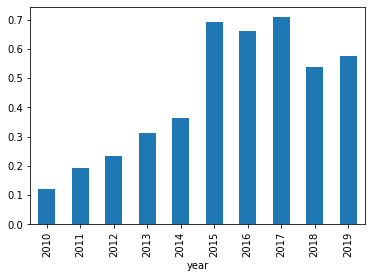

In [75]:
stat_by_year['share_of_shows_by_all'].plot(kind='bar')

In [76]:
display(stat_by_year['share_of_shows_by_all'].describe())

count    10.000000
mean      0.440038
std       0.220643
min       0.121284
25%       0.254322
50%       0.450728
75%       0.639122
max       0.708333
Name: share_of_shows_by_all, dtype: float64

Динамика проката по годам:

,box_office,year
year,,
2010,2.428654e+06,2010
2011,1.410276e+07,2011
2012,6.955423e+06,2012
2013,2.979971e+07,2013
2014,7.444952e+09,2014
2015,3.949737e+10,2015
2016,4.786630e+10,2016
2017,4.856371e+10,2017
2018,4.966840e+10,2018


Text(0.5, 1.0, 'Income per year')

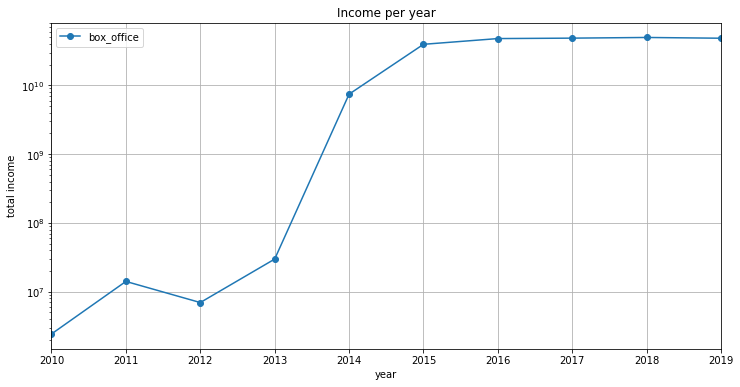

In [77]:
release_per_year = pd.DataFrame(release_data[['year', 'box_office']].groupby('year')['box_office'].sum()) #pd.pivot_table(release)
release_per_year['year'] = release_per_year.index
display(release_per_year)
fig = release_per_year.plot(x='year', y='box_office', style='o-', grid=True, figsize=(12, 6), logy=True)
fig.set_ylabel('total income')
fig.set_title('Income per year')
# release_per_year.hist(bins=10)

Самая большая прибыль с кинопоказов зафиксирована с 2015 года, Самая мальенькая - в 2010. С 2012 до 2015 года можно сказать, что прибыть выросла на 4 порядка.


Построим сводную таблицу и найдем  среднюю и медиану от прибыли кинопоказов по годам.

In [78]:
year_income = pd.pivot_table(release_data, values=['box_office'], index='year', aggfunc=['median', 'mean'])

year_income.columns = ['median_income', 'mean_income']
display(year_income)

,median_income,mean_income
year,,
2010,1700.000,2.313004e+04
2011,3000.000,1.293832e+05
2012,5660.000,5.433924e+04
2013,3522.500,1.619549e+05
2014,18160.000,2.668442e+07
2015,4920933.000,8.494057e+07
2016,3846679.410,9.100057e+07
2017,9968340.000,1.360328e+08
2018,8891102.210,1.045651e+08


Text(0.5, 1.0, 'Income per movie (annually)')

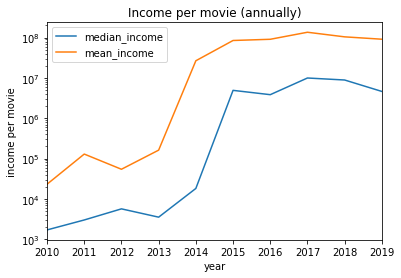

In [79]:
fig = year_income.plot(logy=True)
fig.set_ylabel('income per movie')
fig.set_title('Income per movie (annually)')

Есть несколько елиниц фильмов, у которы прибыль фантастически большая, медианная же - всегда на порядок меньше. 

In [80]:
restriction_income = pd.pivot_table(release_data, values=['box_office'], index=['year'], columns=['age_restriction'], aggfunc=['mean', 'median'])

display(restriction_income)

mean  \
                                            box_office   
age_restriction «0+» - для любой зрительской аудитории   
year                                                     
2010                                      8.580050e+04   
2011                                      4.499957e+05   
2012                                      7.554943e+04   
2013                                      7.325142e+04   
2014                                      9.883217e+06   
2015                                      9.719348e+06   
2016                                      3.664118e+06   
2017                                      7.653298e+07   
2018                                      6.489800e+06   
2019                                      5.915356e+06   

                                                 \
                                                  
age_restriction «12+» - для детей старше 12 лет   
year                                              
2010                               7.067412e+03   
2011                               9.995045e+03   
2012                               6.795875e+03   
2013                               3.485056e+05   
2014                               3.077122e+07   
2015                               1.865217e+08   
2016                               1.488347e+08   
2017                               1.914982e+08   
2018                               2.129447e+08   
2019                               1.491788e+08   

                                                                             \
                                                                              
age_restriction «16+» - для детей старше 16 лет «18+» - запрещено для детей   
year                                                                          
2010                               6.319172e+03                6.798125e+03   
2011                               7.065056e+03                5.200000e+02   
2012                               6.641257e+04                1.074000e+04   
2013                               1.462377e+04                3.225778e+05   
2014                               6.637562e+06                4.910473e+07   
2015                               6.766739e+07                4.115385e+07   
2016                               9.156345e+07                4.499291e+07   
2017                               1.549177e+08                6.565643e+07   
2018                               1.057923e+08                4.893903e+07   
2019                               7.164842e+07                5.531036e+07   

                                               \
                                                
age_restriction «6+» - для детей старше 6 лет   
year                                            
2010                                      NaN   
2011                             4.500000e+02   
2012                             7.146312e+04   
2013                             1.383662e+04   
2014                             5.768715e+07   
2015                             1.641849e+08   
2016                             1.721878e+08   
2017                             2.685809e+08   
2018                             1.486026e+08   
2019                             1.586734e+08   

                                                median  \
                                            box_office   
age_restriction «0+» - для любой зрительской аудитории   
year                                                     
2010                                           6052.50   
2011                                           7010.00   
2012                                          18067.50   
2013                                          13225.00   
2014                                         190855.00   
2015                                        2943318.70   
2016                                        2571294.10   
2017                                       22178956.00   
2018                            

Text(0.5, 1.0, 'Mean income per category annually')

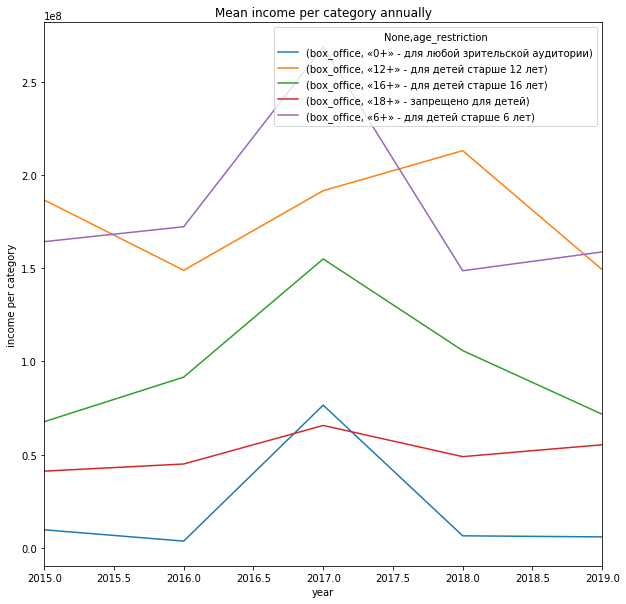

In [81]:
fig = restriction_income['mean'][5:].plot(figsize=(10, 10))
fig.set_ylabel('income per category')
fig.set_title('Mean income per category annually')

Text(0.5, 1, 'Median income per category annually')

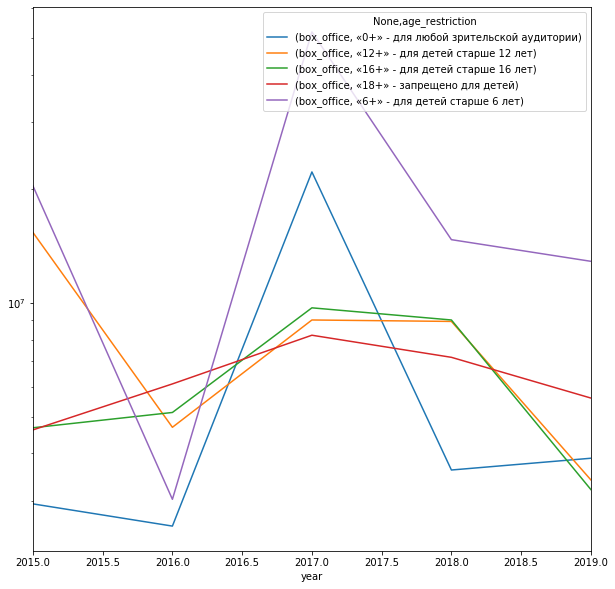

In [82]:
restriction_income['median'][5:].plot(figsize=(10, 10), logy=True)
fig.set_ylabel('income per category')
fig.set_title('Median income per category annually')

Фильмы с ограничением  6+ - самые доходные без учета "черных лебедей" - аномалий. А в среднем самыеь доходные фильмы находятся в категориях 6+ и 12+. Картина в зависимости от года изменяется, за последние годы прибыль на фильм падает. С 2017 года лидирующая категория поменялась на 12+.

### Выводы

Есть фильмы-аномалии, у которых прибыль гораздо выше, чем у остаьных, что перетягивает среденее в более высокую сторону. Самая прибыльная категория без учета аномальм - от 6 лет. Самая прибыльная категория за последние годы - от 12 лет. Прибыль за один фильм за апоследние несколько лет падает.

## Исследование фильмов, получивших господдержку

* Можно выьбрать те фильимы, у которых в графе господдержки > 0, и сравнить с теми, у которых нет господдержки. 
* Посмотреть зависимости прибыли от господдержи
* рейтинг от господдержки
* господдержка в зависимости от категории зрителей. 
* Можно построить корелляции. 
* Исследовать возвратные и невозвратные гос. поддержки, 
* иследовьать есть сязь источника государственной поддержки с остальными параметрами.

Разделять таблицу в итоге оказалось не так удобно, как я думала. Соберем теперь все обратно:)

In [83]:
all_stat = movies_stat.merge(df_shows, how='outer').merge(movies_info, how='outer')
# display(movies_stat)


In [84]:
all_stat['total_support'] = all_stat['refundable_support'] + all_stat['nonrefundable_support'] # общая финансовая поддержув
all_stat['ref_support_part'] = all_stat['refundable_support'] / (all_stat['budget']) # доля возвратной поддержки в бюджете
all_stat['nonref_support_part'] = all_stat['nonrefundable_support'] / (all_stat['budget']) # доля невозвратной поддержки в бюджете
all_stat['total_support_part'] = all_stat['total_support'] / (all_stat['budget']) # доля общей поддержки в бюджете

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(left, right)


Text(0.5, 1.0, 'Income vs Refundable Support')

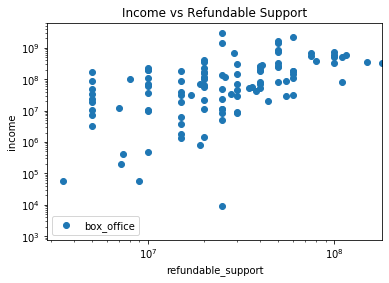

In [85]:
fig = all_stat.plot(x='refundable_support', y='box_office', style='o', logy=True, logx=True)
fig.set_ylabel('income')
fig.set_title('Income vs Refundable Support')

Text(0.5, 1.0, 'Income vs Non-Refundable Support')

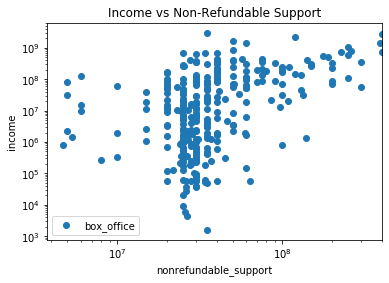

In [86]:
fig = all_stat.plot(x='nonrefundable_support', y='box_office', style='o', logy=True, logx=True)
fig.set_ylabel('income')
fig.set_title('Income vs Non-Refundable Support')

Text(0.5, 1.0, 'Income vs Total Support')

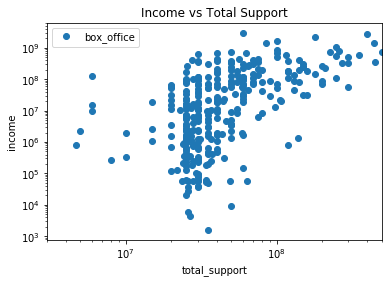

In [87]:
fig = all_stat.plot(x='total_support', y='box_office', style='o', logy=True, logx=True)
fig.set_ylabel('income')
fig.set_title('Income vs Total Support')

Text(0.5, 1.0, 'Rating vs Refundable Support')

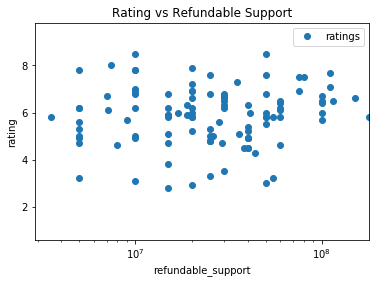

In [88]:
fig = all_stat.plot(x='refundable_support', y='ratings', style='o', logx=True)
fig.set_ylabel('rating')
fig.set_title('Rating vs Refundable Support')

Text(0.5, 1.0, 'Rating vs Non-Refundable Support')

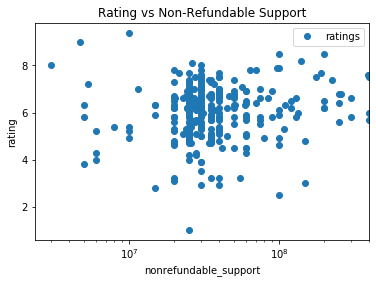

In [89]:
fig = all_stat.plot(x='nonrefundable_support', y='ratings', style='o', logx=True)
fig.set_ylabel('rating')
fig.set_title('Rating vs Non-Refundable Support')

Text(0.5, 1.0, 'Income vs Total Support')

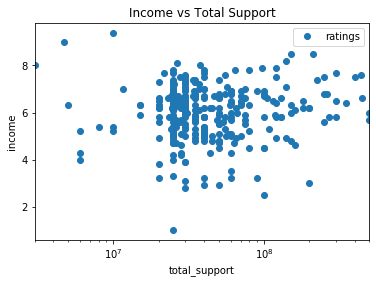

In [90]:
fig = all_stat.plot(x='total_support', y='ratings', style='o', logx=True)
fig.set_ylabel('income')
fig.set_title('Income vs Total Support')

In [91]:
fig = all_stat['income_per_refundable_support'] = all_stat['box_office'] / (all_stat['refundable_support'])

Text(0.5, 1.0, 'Income per Investmets vs Refundable Support')

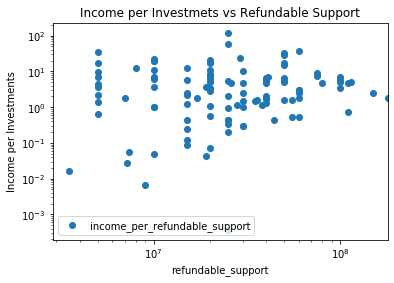

In [92]:
fig = all_stat.plot(x='refundable_support', y='income_per_refundable_support', style='o', logy=True, logx=True)
fig.set_ylabel('Income per Investments')
fig.set_title('Income per Investmets vs Refundable Support')

Практически нет зависимости

In [93]:
all_stat['income_per_nonrefundable_support'] = all_stat['box_office'] / (all_stat['nonrefundable_support'])

Text(0.5, 1.0, 'Income per Investmets vs Non-Refundable Support')

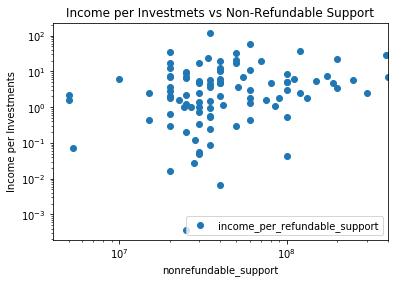

In [94]:
fig = all_stat.plot(x='nonrefundable_support', y='income_per_refundable_support', style='o', logy=True, logx=True)
fig.set_ylabel('Income per Investments')
fig.set_title('Income per Investmets vs Non-Refundable Support')

In [95]:
fig = all_stat['income_per_total_support'] = all_stat['box_office'] / (all_stat['total_support'])

Text(0.5, 1.0, 'Income per Investmets vs Total Support')

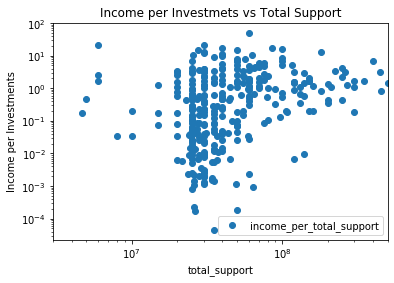

In [96]:
fig = all_stat.plot(x='total_support', y='income_per_total_support', style='o', logy=True, logx=True)
fig.set_ylabel('Income per Investments')
fig.set_title('Income per Investmets vs Total Support')

7167


Text(0.5, 1.0, 'Income per Refundable Part')

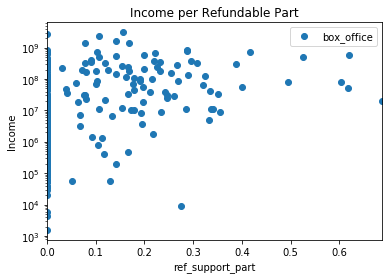

In [97]:
print(all_stat['ref_support_part'].isna().sum())
fig = all_stat[all_stat['budget'] > 0].plot(x='ref_support_part', y='box_office', style='o', logy=True)
fig.set_ylabel('Income')
fig.set_title('Income per Refundable Part')

Text(0.5, 1.0, 'Income per Non-Refundable Part')

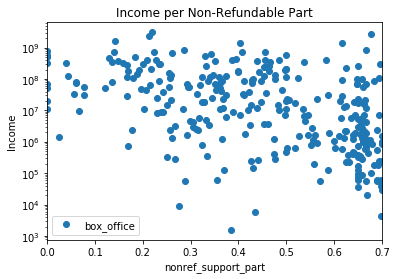

In [98]:
fig = all_stat[all_stat['budget'] > 0].plot(x='nonref_support_part', y='box_office', style='o', logy=True)
fig.set_ylabel('Income')
fig.set_title('Income per Non-Refundable Part')

Text(0.5, 1.0, 'Income per Support Part')

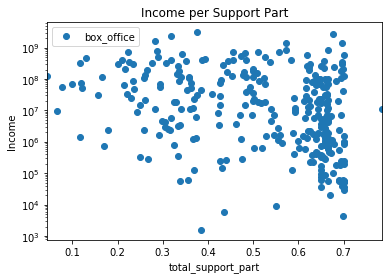

In [99]:
fig = all_stat[all_stat['budget'] > 0].plot(x='total_support_part', y='box_office', style='o', logy=True)
fig.set_ylabel('Income')
fig.set_title('Income per Support Part')

Text(0.5, 1.0, 'Rating per refundable part')

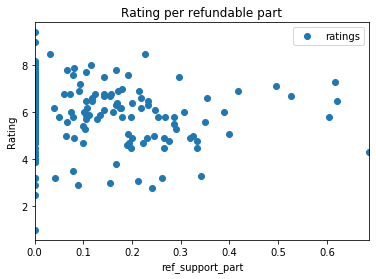

In [100]:
fig = all_stat[all_stat['budget'] > 0].plot(x='ref_support_part', y='ratings', style='o')
fig.set_ylabel('Rating')
fig.set_title('Rating per refundable part')

In [ ]:
fig = all_stat[all_stat['budget'] > 0].plot(x='nonref_support_part', y='ratings', style='o')
fig.set_ylabel('Rating')
fig.set_title('Rating per non-refundable part')

Text(0.5, 1.0, 'Rating per non-refundable part')

In [ ]:
fig = all_stat[all_stat['budget'] > 0].plot(x='total_support_part', y='ratings', style='o')
fig.set_ylabel('Rating')
fig.set_title('Rating per total part')

Объем государственного финансирования положительно влияет на доход фильма, почти не влияет на рейтинг фильма, также почти не влияет на доход с вложенной единицы капитала.

Интересно, что доля невозвратной государственной поддержки отрицательно влияет на сборы.

## Итоговый вывод

Текущие тренды таковы:
    
    * Прибыль с кинопоказов выросла с 2015 года и сейчас находится примерно на плато;
    * Есть небольшое количество фильмов с аномально большим доходом, одновременно с этим наблюдается уменьшение прибыльности каждого отдельного фильма за последние годы;
    * Наиболее прибыльные и, скорее всего, наиболее популярные категории  - `6+` и `12+`
    * Государственная поддержка хорошо влияет на доходность фильма, но повышенная доля невозвратной финансовой помощи плохо влияет на доходность фильма. 